### Part A - Corner Detection

- Pick images of your choice which you feel should give a good output. Use above ones if you cannot find any else. Create or pick 3 images : one flat, one edge, one corner image. Examples shown above, you are free to you them too. Use the sobel kernels to find Ix and Iy ( or Gx and Gy whatever you call it ) and plot them. Then, create a scatter plot for Iy vs Ix. If you threshold, mention clearly that you have along with the threshold value too. Ideally make a function that takes the image and prints the graphs, also make the function return the Iy and Ix values for further questions. Hint: use grayscale only

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [128]:
flat_img_path = "sky_flat_image.jpg"
edge_img_path = "egde_color.jpg"
corner_img_path = "corner.jpg"


In [ ]:
def sobel_corner_analysis(img_path, threshold=None):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print("Image not found:", img_path)
        return None, None
    
    img = img.astype(np.float32)

    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])

    sobel_y = np.array([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]])

    # Compute gradients
    Ix = cv2.filter2D(img, -1, sobel_x)
    Iy = cv2.filter2D(img, -1, sobel_y)

    # Optional thresholding
    if threshold is not None:
        Ix = np.where(np.abs(Ix) > threshold, Ix, 0)
        Iy = np.where(np.abs(Iy) > threshold, Iy, 0)
        print(f"Threshold applied: {threshold}")
        
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.title("Ix (Sobel X)")
    plt.imshow(Ix, cmap='gray')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.title("Iy (Sobel Y)")
    plt.imshow(Iy, cmap='gray')
    plt.axis('off')

    # Scatter plot Iy vs Ix
    plt.subplot(1,3,3)
    plt.title("Iy vs Ix Scatter")
    plt.scatter(Ix.flatten(), Iy.flatten(), s=1)
    plt.xlabel("Ix")
    plt.ylabel("Iy")

    plt.tight_layout()
    plt.show()

    return Ix, Iy


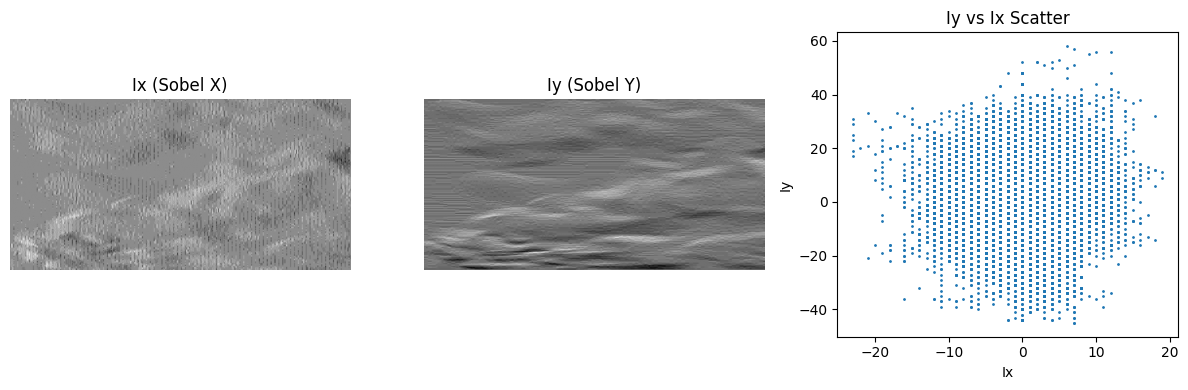

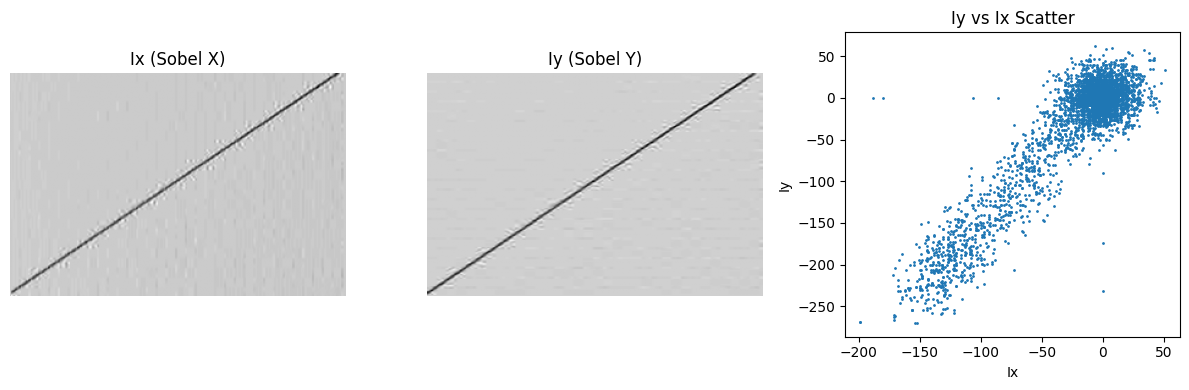

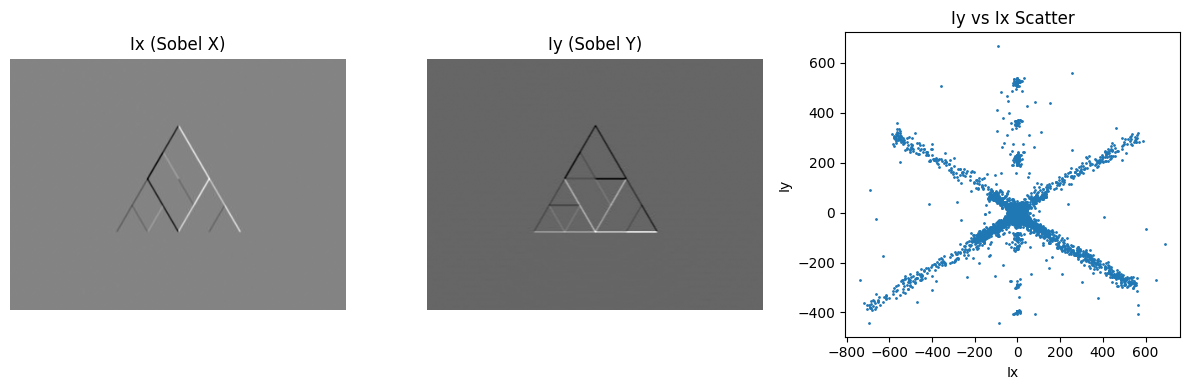

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], shape=(300, 400), dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], shape=(300, 400), dtype=float32))

In [130]:
sobel_corner_analysis(flat_img_path)
sobel_corner_analysis(edge_img_path)
sobel_corner_analysis(corner_img_path)


### part B 
- Ellipse Fitting and R Maps for Corner Detection
Now, use the above functions ( basically Ix and Iy ) and the formulas in the pre-session videos to find values of a,b and c ( the second moments ) and calculate the eigenvalues lambda1 and lambda2. Then use those to create an R map for the entire image. Display the R map. Do it for the 3 images of part A. So, you might want to create a function that takes the image, loops over the pixels with a window, fits the ellipse over the window, calculates the lambdas, and value of R, essentially finding R values for all the pixels and returning an R-map ( a 2d image with only one channel where the value of a pixel is the r-value of that pixel in the original grayscale image ).Now, display these R maps. Notice how the corners are clearly visible in white.

In [131]:
def compute_R_map(Ix, Iy, window_size=3, k=0.04):
    h, w = Ix.shape
    offset = window_size // 2

    R_map = np.zeros((h, w))

    for i in range(offset, h - offset):
        for j in range(offset, w - offset):
            
            # Extract window
            Ix_window = Ix[i-offset:i+offset+1, j-offset:j+offset+1]
            Iy_window = Iy[i-offset:i+offset+1, j-offset:j+offset+1]

            # Second moment matrix components
            a = np.sum(Ix_window ** 2)
            b = np.sum(Ix_window * Iy_window)
            c = np.sum(Iy_window ** 2)

            # Harris response
            det = (a * c) - (b ** 2)
            trace = a + c
            R = det - k * (trace ** 2)

            R_map[i, j] = R

    return R_map


In [132]:
def show_R_map(R_map, title="R Map"):
    plt.figure(figsize=(5,5))
    plt.imshow(R_map, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()


This gradient distribution forms an ellipse.
- Small ellipse → flat
- Long thin ellipse → edge
- Big round ellipse → corner
 Eigenvalues measure this spread.

Eigenvalues tell:
- how strong gradients are in two orthogonal directions
Interpretation:
- λ₁ ≈ 0, λ₂ ≈ 0 → flat
- one large, one small → edge
- both large → corner

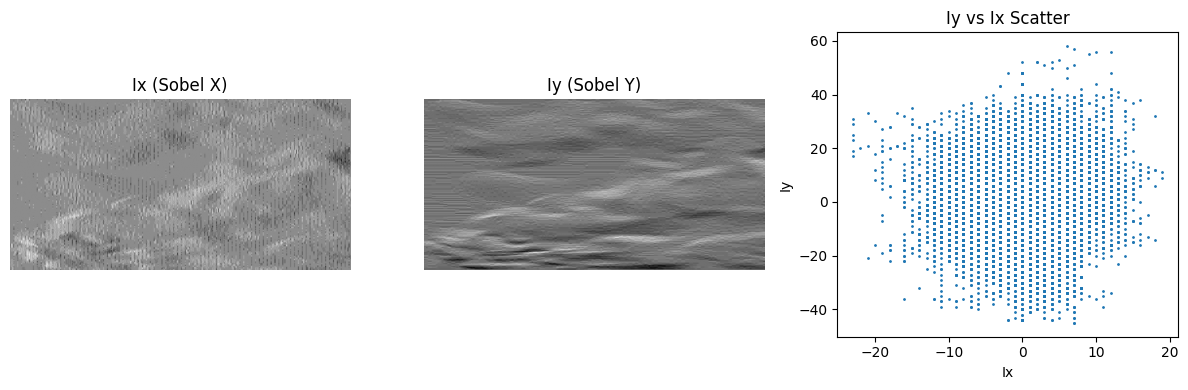

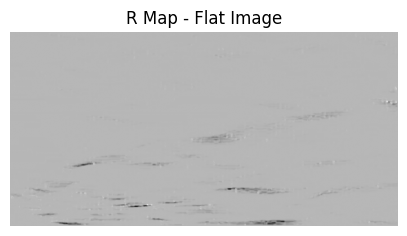

In [133]:
Ix_f, Iy_f = sobel_corner_analysis(flat_img_path)
R_flat = compute_R_map(Ix_f, Iy_f)
show_R_map(R_flat, "R Map - Flat Image")


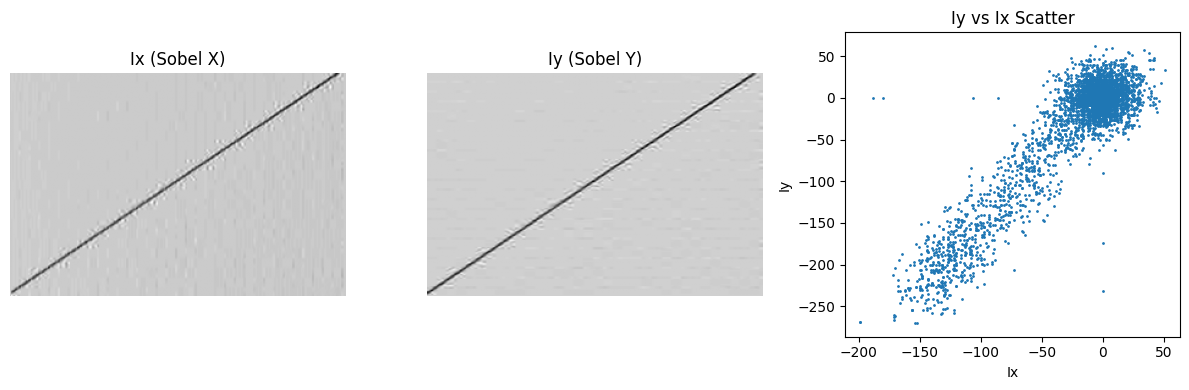

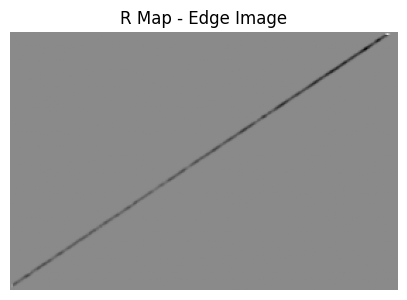

In [134]:
Ix_e, Iy_e = sobel_corner_analysis(edge_img_path)
R_edge = compute_R_map(Ix_e, Iy_e)
show_R_map(R_edge, "R Map - Edge Image")


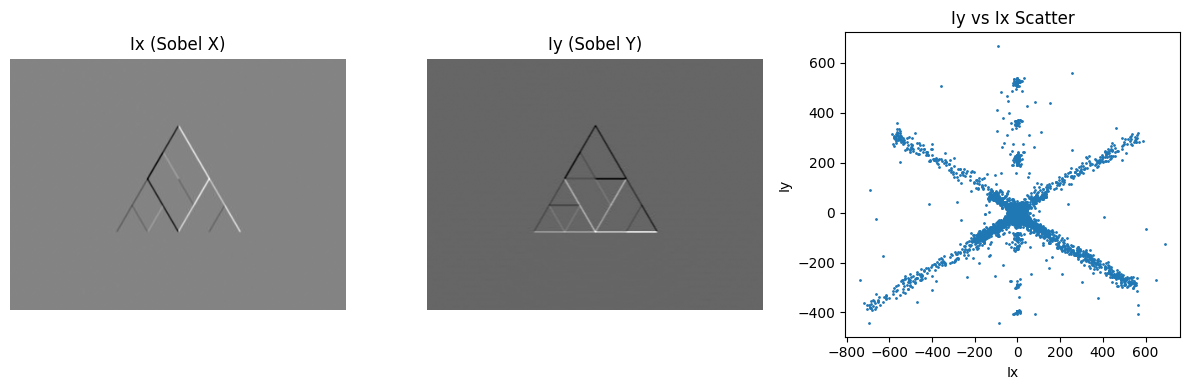

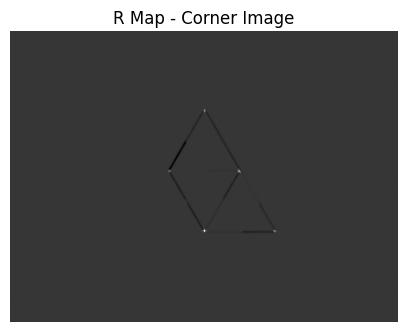

In [135]:
Ix_c, Iy_c = sobel_corner_analysis(corner_img_path)
R_corner = compute_R_map(Ix_c, Iy_c)
show_R_map(R_corner, "R Map - Corner Image")


The second-moment matrix was computed for each pixel using Sobel gradients Ix and Iy over a local window.
The Harris response R was calculated using the determinant and trace of the matrix.
Flat regions produce low R values, edges produce moderate values, and corners produce high positive R values, which appear as bright regions in the R-map.

Part C - Hough Transforms
Again, import an image, create a function that takes the image, finds the canny edge map, then loops through it to find the equivalent line of each pixel, checks whether the slope and intercept are within acceptable limits of the accumulator size ( if not, discard ), does the voting procedure and creates the accumulator. Now, choose an accurate threshold for the accumulator to get the slope and intercept for a good number of lines in the image. One thing you can do is normalise the accumulator and use a 90 percent threshold ( just an example, im not telling if 90p is a good one or not ), then, mark the lines in the image using cv2 and display the final output. For the slope and intercept, choose the limit as per your image to get a good output. Please dont make it super large so it take hours to run and give the output.

Now, you can do the same but with rho theta method. Do this in a separate code cell from slope-intercept method and notice how fast this is

In [136]:
img_path = "testing5.jpg"


In [137]:
def hough_slope_intercept(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    edges = cv2.Canny(gray, 100, 200)

    h, w = edges.shape

    # slope range (limited to avoid slowness)
    m_vals = np.linspace(-1, 1, 200)
    c_vals = np.linspace(-h, h, 200)

    accumulator = np.zeros((len(m_vals), len(c_vals)))

    ys, xs = np.where(edges > 0)

    for x, y in zip(xs, ys):
        for mi, m in enumerate(m_vals):
            c = y - m * x
            ci = np.searchsorted(c_vals, c)
            if 0 <= ci < len(c_vals):
                accumulator[mi, ci] += 1

    # normalize
    accumulator = accumulator / accumulator.max()

    return img, accumulator, m_vals, c_vals


In [138]:
def draw_lines_mc(img, accumulator, m_vals, c_vals, threshold=0.9):
    out = img.copy()
    idx = np.where(accumulator > threshold)

    for mi, ci in zip(idx[0], idx[1]):
        m = m_vals[mi]
        c = c_vals[ci]

        x1, y1 = 0, int(c)
        x2, y2 = img.shape[1], int(m * img.shape[1] + c)

        cv2.line(out, (x1, y1), (x2, y2), (0,0,255), 1)

    plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    plt.title("Hough Lines (Slope–Intercept)")
    plt.axis('off')
    plt.show()


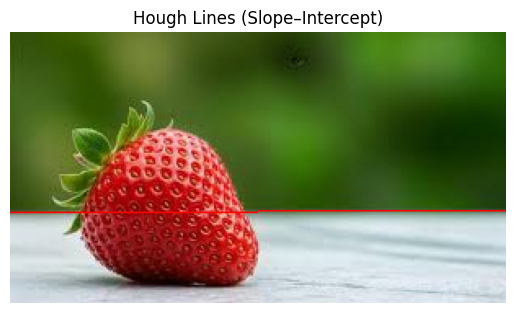

In [139]:
img, acc, m_vals, c_vals = hough_slope_intercept("testing5.jpg")
draw_lines_mc(img, acc, m_vals, c_vals, threshold=0.9)


PART C-2 : HOUGH USING (ρ, θ) 

In [140]:
def hough_rho_theta(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    edges = cv2.Canny(gray, 100, 200)

    h, w = edges.shape
    diag = int(np.sqrt(h*h + w*w))

    thetas = np.linspace(0, np.pi, 180)
    rhos = np.linspace(-diag, diag, 2*diag)

    accumulator = np.zeros((len(rhos), len(thetas)))

    ys, xs = np.where(edges > 0)

    for x, y in zip(xs, ys):
        for ti, theta in enumerate(thetas):
            rho = x*np.cos(theta) + y*np.sin(theta)
            ri = np.searchsorted(rhos, rho)
            if 0 <= ri < len(rhos):
                accumulator[ri, ti] += 1

    accumulator = accumulator / accumulator.max()
    return img, accumulator, rhos, thetas


In [141]:
def draw_lines_rho_theta(img, accumulator, rhos, thetas, threshold=0.6):
    out = img.copy()
    idx = np.where(accumulator > threshold)

    for ri, ti in zip(idx[0], idx[1]):
        rho = rhos[ri]
        theta = thetas[ti]

        a = np.cos(theta)
        b = np.sin(theta)

        x0 = a * rho
        y0 = b * rho

        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(out, (x1,y1), (x2,y2), (0,255,0), 1)

    plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    plt.title("Hough Lines (Rho–Theta)")
    plt.axis('off')
    plt.show()


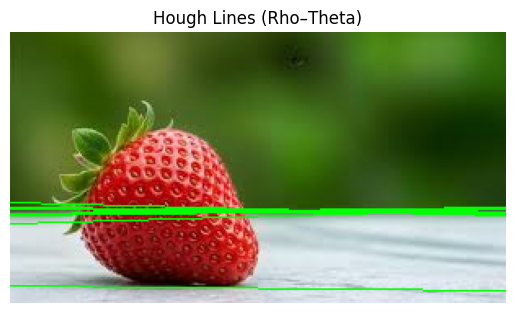

In [142]:
img, acc, rhos, thetas = hough_rho_theta("testing5.jpg")
draw_lines_rho_theta(img, acc, rhos, thetas, threshold=0.6)


In the slope–intercept method, the accumulator size is large and the algorithm is slow due to unbounded slope values.
In contrast, the rho–theta formulation uses bounded parameters, resulting in a smaller accumulator and significantly faster computation.
This demonstrates why the rho–theta Hough Transform is preferred in practice.